In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib.dates import date2num, DateFormatter
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:

# df contains data on from Futuretech on algorthmic improvements in language models
df = pd.read_csv("Datasets/Alg_bench.csv", parse_dates=["Publication date"])
df["date"] = pd.to_datetime(df["Publication date"])
# convert params to numeric
df["Parameters"] = pd.to_numeric(df["Parameters"], errors='coerce')

In [3]:

#select elements with goood perplexity
df.dropna(subset=["Perplexity (WT103)"])
df.dropna(subset=["Parameters"])
df.dropna(subset=["date"])
good = df
# conver to numeric
good["Perplexity (WT103)"] = pd.to_numeric(good["Perplexity (WT103)"], errors='coerce') 

In [4]:
good = good[good["Perplexity (WT103)"] < 40]

In [5]:
#graph minimum parameters to get good MMLU over time 
good.sort_values("date", inplace=True)
maxs = []
firstmindate = []
firstminparams = []
minparam = float("inf")
print(minparam, "minparam")

inf minparam


/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_58190/3852203576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good.sort_values("date", inplace=True)


In [7]:
for i in range(len(good)):
    # maxs.append(good["Parameters"][:i].min())
    if minparam > good["Parameters"][i]:
        print(good["Parameters"][i], "good")
        firstmindate.append(good["date"][i])
        firstminparams.append(good["Parameters"][i])
        minparam = good["Parameters"][i]
# plt.scatter(good["date"], maxs, color="blue")
plt.scatter(firstmindate, firstminparams, color="red")
plt.yscale('log')

KeyError: 0

In [ ]:
# only graph the date an parameters that first reach the minimum perplexity

In [8]:


import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe

# Drop rows with NaN values in specific columns
df.dropna(subset=["Perplexity (WT103)", "Parameters", "date"], inplace=True)

# Convert "Perplexity (WT103)" to numeric
df["Perplexity (WT103)"] = pd.to_numeric(df["Perplexity (WT103)"], errors='coerce')

# Filter rows with "Perplexity (WT103)" < 40
good = df[(df["Perplexity (WT103)"]<20) & (df["Perplexity (WT103)"] > 18)]

# Sort the dataframe by date
good.sort_values("date", inplace=True)

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_58190/2602881327.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good.sort_values("date", inplace=True)


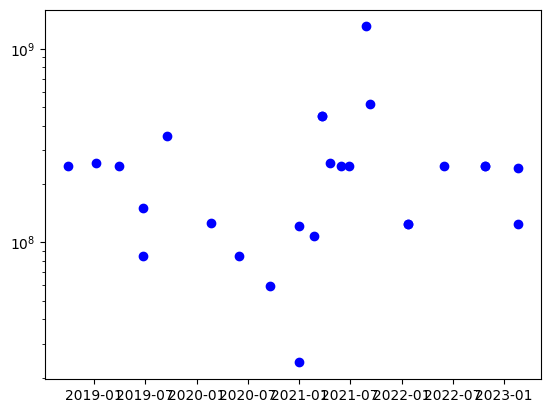

In [9]:
plt.scatter(good["date"], good["Parameters"], color="blue")
plt.yscale('log')

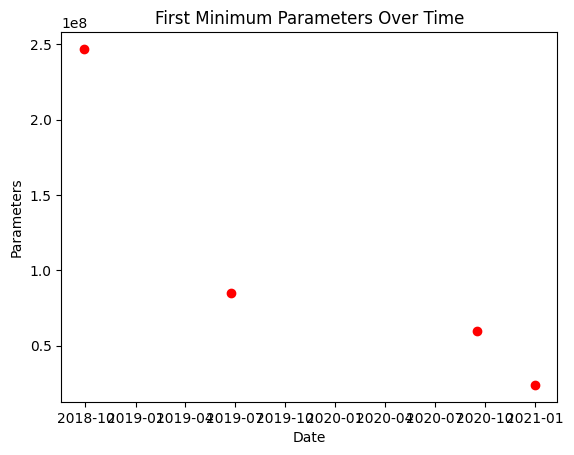

In [10]:

# Initialize lists to store the first minimum parameters and corresponding dates
firstmindate = []
firstminparams = []
minparam = float("inf")

# Loop through the dataframe to find the first minimum parameters
for i in range(len(good)):
    if minparam > good["Parameters"].iloc[i]:
        firstmindate.append(good["date"].iloc[i])
        firstminparams.append(good["Parameters"].iloc[i])
        minparam = good["Parameters"].iloc[i]

# Plotting the results
plt.scatter(firstmindate, firstminparams, color="red")
# plt.yscale('log')
plt.xlabel("Date")
plt.ylabel("Parameters")
plt.title("First Minimum Parameters Over Time")
plt.show()